<a href="https://colab.research.google.com/github/copev313/Google-Trends-Analysis/blob/main/Google-Trends-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Trends Analysis
---

We take on the task of utilizing data collected by Google searches to perform an exploratory analysis. This project will be using `pytrends` to leverage Google search queries.


## Import Libraries

In [2]:
!pip install pytrends pandas matplotlib --quiet

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

---

## **Setup Our Trends Request**

In [17]:
SEARCH_TERM = 'Deep Learning'

In [21]:
trends = TrendReq()
trends.build_payload(
    kw_list=[SEARCH_TERM]
)

interest_data = trends.interest_by_region()
interest_data = interest_data.sort_values(SEARCH_TERM, ascending=False)

# List Top 10 Countries:
top_ten_data = interest_data.head(10)
print(top_ten_data)

             Deep Learning
geoName                   
China                  100
South Korea             17
Singapore               10
Hong Kong                8
Ethiopia                 7
Israel                   7
St. Helena               6
Tunisia                  6
Taiwan                   6
Nepal                    4


---

## **Data Visualization**

### *Bar Chart of Top 10 Interested Countries*

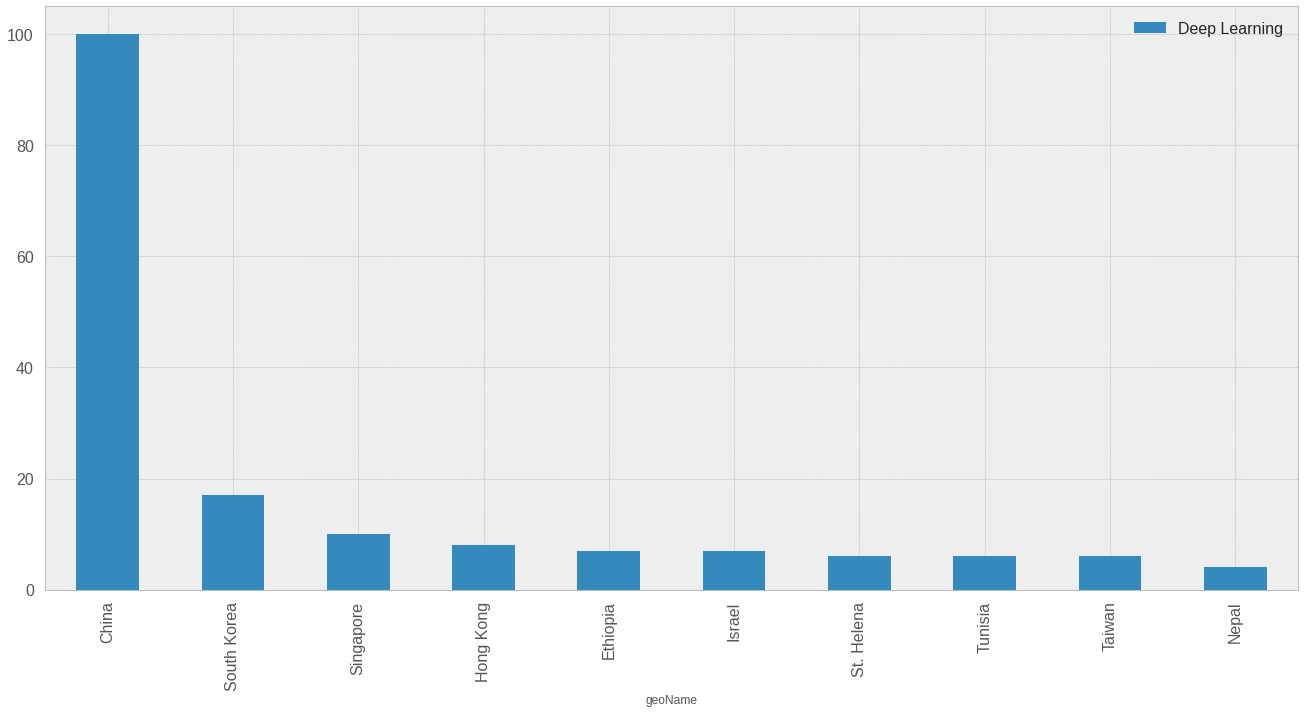

In [31]:
# Configure Bar Chart:
top_ten_data.reset_index().plot(
    x='geoName',
    y=SEARCH_TERM,
    figsize=(20, 10),
    kind='bar',

)

# Add styling:
plt.style.use('dark_background')
plt.show()

### *Increase/Decrease of Total Google Searches for Deep Learning*

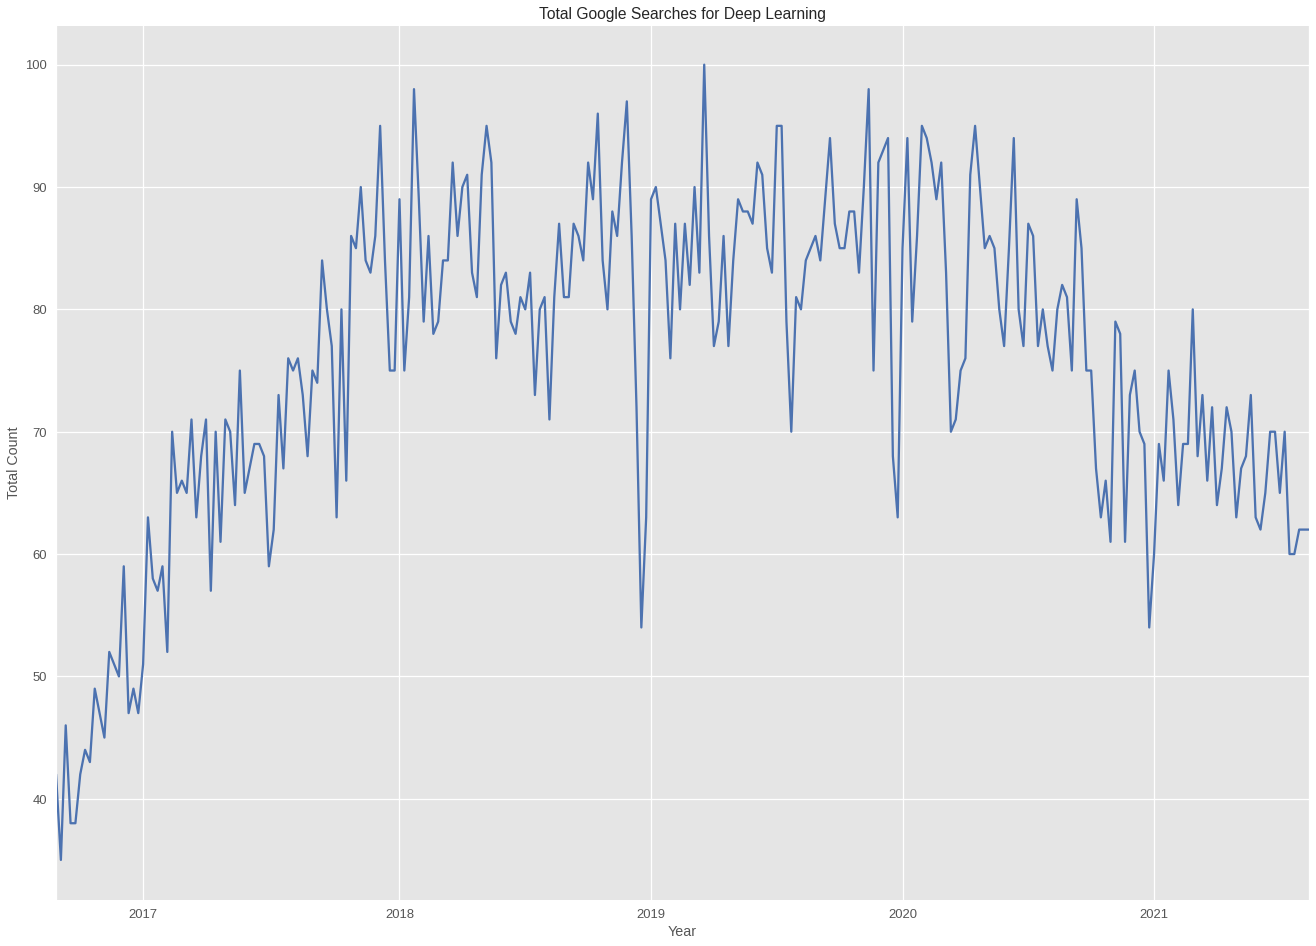

In [29]:
# Create Trends Object (w/ default args):
trendy_obj = TrendReq()
trendy_obj.build_payload(
    kw_list=[SEARCH_TERM]
)

# Get Interest Over Time Data:
trends_iot_data = trendy_obj.interest_over_time()

# Configure Line Plot:
fig, ax = plt.subplots(figsize=(20, 15))
trends_iot_data[SEARCH_TERM].plot()

plt.title(f"Total Google Searches for {SEARCH_TERM}")
plt.xlabel('Year')
plt.ylabel('Total Count')

plt.style.use('seaborn-poster')

plt.show()


## Interpretation & Conclusion

It is easy to see that 'Deep Learning' was a term most frequently searched for in China. Moreover, the total number of searches for 'Deep Learning' increased drastically from 2017 to 2018, reaching an all time high in early 2019.

The `pytrends` library proves itself to be a very useful tool for getting Google search statistics. More information on the project see their GitHub [here](https://github.com/GeneralMills/pytrends).

---